In [1]:
# Import packages and functions
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from palmerpenguins import load_penguins

In [2]:
# Load the penguins data from palmerpenguins module
penguins = load_penguins()

# Drop penguins with missing values
penguins = penguins.dropna()

# Calculate summary statistics using .describe()
penguins.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


In [3]:
# y = output features
y = penguins['species']

# X = input features
X = penguins.drop('species', axis=1)

# Convert categorical inputs like species and island into dummy variables
X = pd.get_dummies(X, drop_first=True)

X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,0,1,1
1,39.5,17.4,186.0,3800.0,2007,0,1,0
2,40.3,18.0,195.0,3250.0,2007,0,1,0
4,36.7,19.3,193.0,3450.0,2007,0,1,0
5,39.3,20.6,190.0,3650.0,2007,0,1,1
...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,1,0,1
340,43.5,18.1,202.0,3400.0,2009,1,0,0
341,49.6,18.2,193.0,3775.0,2009,1,0,1
342,50.8,19.0,210.0,4100.0,2009,1,0,1


In [4]:
# Create a training/testing split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=8675309
)

# Initialize the random forest model
rfModel = RandomForestClassifier(max_depth=2, max_features='sqrt', random_state=99)

# Fit the random forest model on the training data
rfModel.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=99)

In [5]:
pd.DataFrame(
    data={
        'feature': rfModel.feature_names_in_,
        'importance': rfModel.feature_importances_,
    }
).sort_values('importance', ascending=False)

,feature,importance
2,flipper_length_mm,0.233537
1,bill_depth_mm,0.221468
0,bill_length_mm,0.215703
3,body_mass_g,0.192141
5,island_Dream,0.108376
6,island_Torgersen,0.026108
7,sex_male,0.001715
4,year,0.000951


In [6]:
# Predict species on the testing data
y_pred = rfModel.predict(X_test)

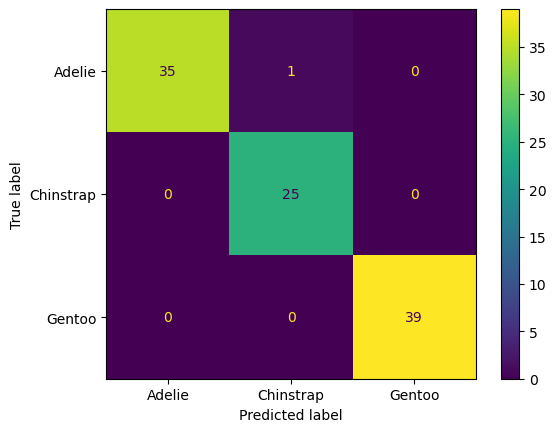

In [7]:
# Calculate a confusion matrix
metrics.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [8]:
# Calculate the Gini index
probs = pd.DataFrame(data=rfModel.predict_proba(X_test))
print("Gini index ", (probs * (1 - probs)).mean().sum())

Gini index  0.35684541672184994


[Text(0.5, 0.8333333333333334, 'bill_depth_mm <= 16.35\ngini = 0.634\nsamples = 144\nvalue = [106, 47, 80]'),
 Text(0.25, 0.5, 'bill_length_mm <= 39.7\ngini = 0.049\nsamples = 48\nvalue = [2, 0, 77]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 46\nvalue = [0, 0, 77]'),
 Text(0.75, 0.5, 'island_Torgersen <= 0.5\ngini = 0.45\nsamples = 96\nvalue = [104, 47, 3]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.514\nsamples = 72\nvalue = [64, 47, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 24\nvalue = [40, 0, 0]')]

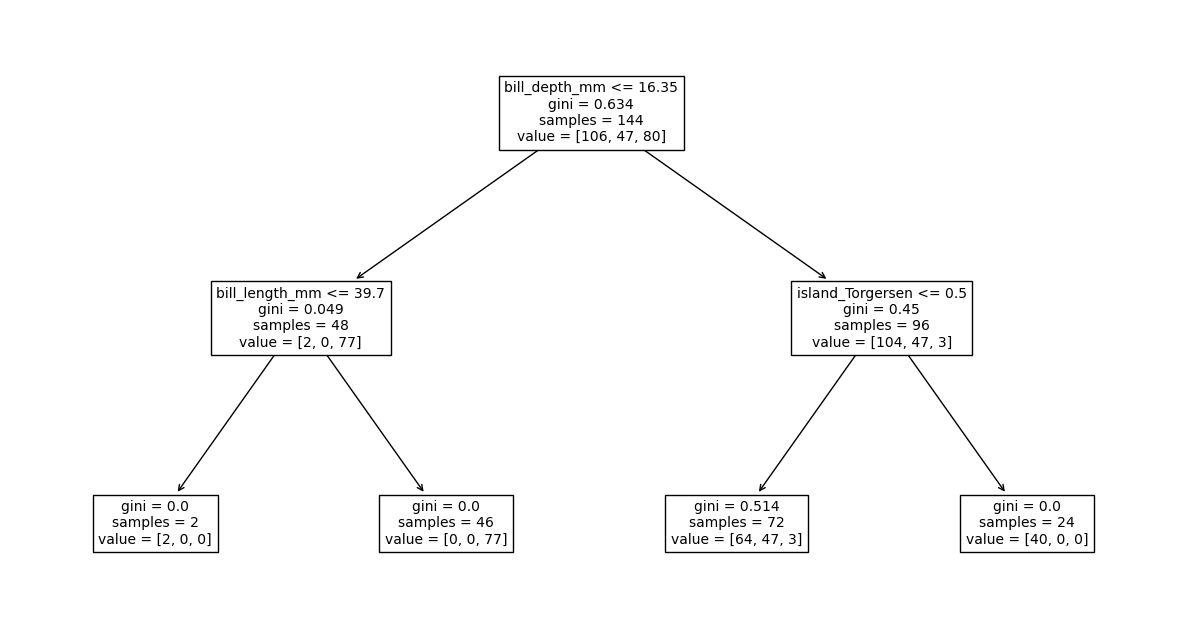

In [9]:
# Save the first random forest tree as singleTree
singleTree = rfModel.estimators_[0]

# Set image size
plt.figure(figsize=[15, 8])

# Plot a single regression tree
tree.plot_tree(singleTree, feature_names=X.columns, filled=False, fontsize=10)